# Dokumentasi Model ResNet50

## Pendahuluan
ResNet50 (Residual Network) adalah model *deep learning* yang sangat dalam dengan 50 lapisan, yang dirancang untuk menangani masalah *vanishing gradients* dalam pelatihan jaringan neural yang dalam. Arsitektur Residual Network menggunakan *skip connections* atau *shortcut connections* untuk memungkinkan gradien mengalir melalui jaringan secara lebih efektif.

**Struktur ResNet50** terdiri dari lapisan-lapisan sebagai berikut:
- Lapisan convolutional
- Lapisan residual (dengan shortcut connections)
- *Batch normalization* dan ReLU activation
- Lapisan pooling
- Lapisan fully connected
- *Softmax* untuk klasifikasi

---

## Cara Kerja ResNet50

### Tahapan Proses ResNet50
Berikut adalah tahapan utama dari *ResNet50* mulai dari input gambar hingga output prediksi:

1. **Input**: Gambar dalam dimensi 224x224x3 (RGB image).
2. **Convolutional Layer**: Aplikasi *convolution* pertama dengan 64 filter 7x7 dan stride 2.
3. **Max Pooling**: Mengurangi ukuran fitur map.
4. **First Residual Block**: Blok residual pertama yang mengaplikasikan *skip connections* untuk menghindari *vanishing gradients*.
5. **Second Residual Block**: Blok residual kedua, lebih dalam, menangkap fitur yang lebih kompleks.
6. **Third Residual Block**: Blok residual ketiga dengan lebih banyak filter untuk meningkatkan kedalaman.
7. **Fourth Residual Block**: Blok residual terakhir sebelum menuju ke lapisan fully connected.
8. **Average Pooling**: Menghasilkan fitur map yang lebih kecil untuk diproses oleh lapisan fully connected.
9. **Fully Connected Layer**: Lapisan yang mengklasifikasikan gambar ke dalam 1000 kategori.
10. **Softmax Activation**: Menghasilkan probabilitas untuk setiap kelas.
11. **Output**: Label dengan probabilitas tertinggi menjadi prediksi akhir.

---

### Diagram Alur ResNet50

```plaintext
1. INPUT (Gambar) --> [Ukuran: Bebas, contoh: 224x224x3 (W x H x Channels)]

   |
   V

2. CONVOLUTIONAL LAYER (7x7, 64 filters, stride 2, padding) --> Menghasilkan fitur awal dari gambar
   |
   V

3. MAX POOLING (3x3, stride 2) --> Mengurangi ukuran fitur map
   |
   V

4. FIRST RESIDUAL BLOCK (x3) --> Blok residual pertama
   - 1x1 convolution (64 filters) + BatchNorm + ReLU
   - 3x3 convolution (64 filters) + BatchNorm + ReLU
   - 1x1 convolution (256 filters) + BatchNorm
   - Skip connection yang menyambungkan input asli ke output
   |
   V

5. SECOND RESIDUAL BLOCK (x4) --> Blok residual kedua
   - 1x1 convolution (128 filters) + BatchNorm + ReLU
   - 3x3 convolution (128 filters) + BatchNorm + ReLU
   - 1x1 convolution (512 filters) + BatchNorm
   - Skip connection
   |
   V

6. THIRD RESIDUAL BLOCK (x6) --> Blok residual ketiga
   - 1x1 convolution (256 filters) + BatchNorm + ReLU
   - 3x3 convolution (256 filters) + BatchNorm + ReLU
   - 1x1 convolution (1024 filters) + BatchNorm
   - Skip connection
   |
   V

7. FOURTH RESIDUAL BLOCK (x3) --> Blok residual keempat
   - 1x1 convolution (512 filters) + BatchNorm + ReLU
   - 3x3 convolution (512 filters) + BatchNorm + ReLU
   - 1x1 convolution (2048 filters) + BatchNorm
   - Skip connection
   |
   V

8. AVERAGE POOLING (Global Pooling) --> Mereduksi ukuran fitur map ke bentuk yang lebih kecil
   |
   V

9. FULLY CONNECTED LAYER (1000 nodes) --> Mengklasifikasikan output ke 1000 kategori (untuk ImageNet)
   |
   V

10. SOFTMAX ACTIVATION --> Menghasilkan probabilitas untuk tiap kelas
   |
   V

11. OUTPUT (Label Prediksi) --> Label dengan probabilitas tertinggi


Folder yang dipilih secara acak: dendeng_batokok
Gambar yang dipilih secara acak: dendeng_batokok (38).jpg


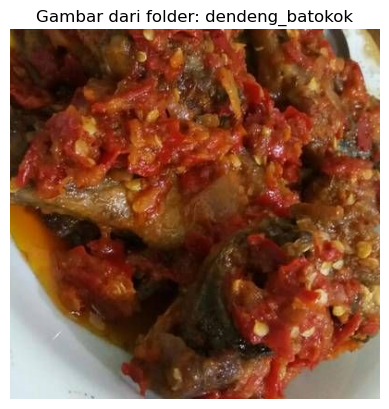

In [2]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Tentukan path ke folder utama (ganti path sesuai lokasi datasetmu)
main_directory = '../dataset_padang_food'  

# Mendapatkan daftar folder di dalam direktori utama
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]

# Memilih folder acak dari daftar folder
random_folder = random.choice(folders)
print(f"Folder yang dipilih secara acak: {random_folder}")

# Mendapatkan path folder yang dipilih
random_folder_path = os.path.join(main_directory, random_folder)

# Mendapatkan daftar file gambar di dalam folder yang dipilih
image_files = [f for f in os.listdir(random_folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]

# Memilih gambar acak dari folder yang dipilih
random_image_file = random.choice(image_files)
print(f"Gambar yang dipilih secara acak: {random_image_file}")

# Mendapatkan path lengkap dari gambar yang dipilih
random_image_path = os.path.join(random_folder_path, random_image_file)

# Membuka dan menampilkan gambar menggunakan PIL dan matplotlib
image = Image.open(random_image_path)
plt.imshow(image)
plt.title(f"Gambar dari folder: {random_folder}")
plt.axis('off')  # Menyembunyikan axis
plt.show()


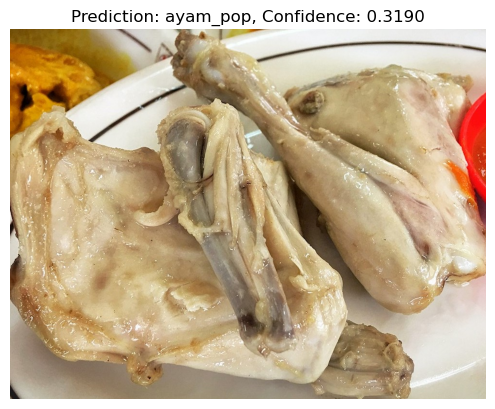

Top 3 Predictions:
ayam_pop: 0.3190
gulai_tambusu: 0.1196
gulai_ikan: 0.0695


In [6]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

# Path to the main dataset folder
main_directory = '../dataset_padang_food'

# Pilih folder dan gambar acak dari dataset seperti sebelumnya
folders = [f for f in os.listdir(main_directory) if os.path.isdir(os.path.join(main_directory, f))]
random_folder = random.choice(folders)
random_folder_path = os.path.join(main_directory, random_folder)
image_files = [f for f in os.listdir(random_folder_path) if f.endswith(('jpg', 'jpeg', 'png'))]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(random_folder_path, random_image_file)

# Load a pre-trained model (ResNet50 for demonstration)
model = models.resnet50(pretrained=True)
model.eval()

# Image transformation pipeline (resize, normalize)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the image and apply preprocessing
image = Image.open(random_image_path)
image_preprocessed = preprocess(image).unsqueeze(0)

# Run the model and get predictions
with torch.no_grad():
    output = model(image_preprocessed)

# Convert the predictions to probabilities
probabilities = torch.nn.functional.softmax(output[0], dim=0)

# Custom labels sesuai dataset makanan Padang
labels = ['ayam_goreng', 'ayam_pop', 'daging_rendang', 'dendeng_batokok', 'gulai_ikan', 'gulai_tambusu', 'gulai_tunjang', 'telur_balado', 'telur_dadar']

# Show top 3 predictions (ResNet50 gives output for 1000 classes; map them to your 9 classes)
top_probs, top_idxs = torch.topk(probabilities, 3)

# Map top indexes to the limited number of labels (custom labels)
top_labels = [labels[i % len(labels)] for i in top_idxs]  # Modulo ensures indexing within custom labels

# Display the image and top prediction
plt.imshow(image)
plt.title(f"Prediction: {top_labels[0]}, Confidence: {top_probs[0].item():.4f}")
plt.axis('off')  # Hide axes for better view
plt.show()

# Display top 3 predictions
print("Top 3 Predictions:")
for i in range(3):
    print(f"{top_labels[i]}: {top_probs[i].item():.4f}")
